<a href="https://colab.research.google.com/github/Selva-Subramanian/Playstore-Apps-Review-Analysis/blob/main/Playstore_Apps_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
# load the dataset
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter Notebooks/Capstone projects/Playstore Apps Review Analysis - Selva Subramanian S/'
df1 = pd.read_csv(working_dir_path + 'Copy of Play Store Data.csv')
df2 = pd.read_csv(working_dir_path + 'Copy of User Reviews.csv')

In [37]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
df2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [41]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [42]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [43]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [44]:
df1 = df1.loc[df1["Category"] != '1.9']

In [45]:
df1['Category'].value_counts()*100/df1['Category'].value_counts().sum()

FAMILY                 18.191882
GAME                   10.553506
TOOLS                   7.776753
MEDICAL                 4.271218
BUSINESS                4.243542
PRODUCTIVITY            3.911439
PERSONALIZATION         3.616236
COMMUNICATION           3.570111
SPORTS                  3.542435
LIFESTYLE               3.523985
FINANCE                 3.376384
HEALTH_AND_FITNESS      3.145756
PHOTOGRAPHY             3.090406
SOCIAL                  2.721402
NEWS_AND_MAGAZINES      2.610701
SHOPPING                2.398524
TRAVEL_AND_LOCAL        2.380074
DATING                  2.158672
BOOKS_AND_REFERENCE     2.130996
VIDEO_PLAYERS           1.614391
EDUCATION               1.439114
ENTERTAINMENT           1.374539
MAPS_AND_NAVIGATION     1.263838
FOOD_AND_DRINK          1.171587
HOUSE_AND_HOME          0.811808
AUTO_AND_VEHICLES       0.784133
LIBRARIES_AND_DEMO      0.784133
WEATHER                 0.756458
ART_AND_DESIGN          0.599631
EVENTS                  0.590406
PARENTING 

Text(0, 0.5, 'Count of apps on playstore')

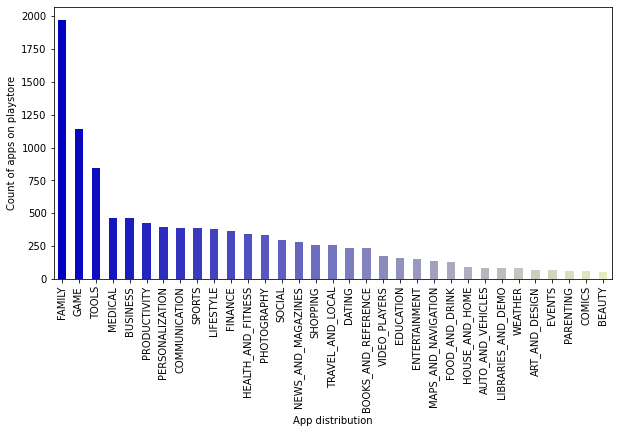

In [46]:
my_colors = ['g', 'b']*5
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5 
my_colors = [(x/35.0, x/35.0, 0.75) for x in range(35)]
plt.rcParams['figure.figsize'] = (10,5)
df1['Category'].value_counts().plot(kind='bar',color=my_colors)
# plt.title('App category')
plt.xlabel('App distribution')
plt.ylabel('Count of apps on playstore')

In [47]:
df1['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [48]:
installs_df = df1.groupby('Category')['Installs'].value_counts().unstack()

In [49]:
installs_df

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,"100,000+","100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,NaN,1.0,NaN,3.0,4.0,NaN,NaN,11.0,5.0,1.0,19.0,NaN,NaN,5.0,3.0,NaN,6.0,1.0,NaN,6.0,NaN
AUTO_AND_VEHICLES,NaN,NaN,1.0,8.0,13.0,NaN,5.0,6.0,2.0,6.0,23.0,NaN,2.0,2.0,3.0,1.0,5.0,NaN,3.0,5.0,NaN
BEAUTY,NaN,NaN,NaN,1.0,8.0,NaN,NaN,13.0,1.0,5.0,8.0,NaN,NaN,3.0,1.0,1.0,5.0,NaN,1.0,6.0,NaN
BOOKS_AND_REFERENCE,NaN,NaN,1.0,34.0,20.0,1.0,19.0,25.0,24.0,7.0,20.0,6.0,7.0,16.0,10.0,3.0,12.0,NaN,9.0,17.0,NaN
BUSINESS,NaN,1.0,5.0,49.0,46.0,NaN,42.0,46.0,18.0,76.0,37.0,3.0,18.0,17.0,23.0,25.0,12.0,7.0,23.0,12.0,NaN
COMICS,NaN,NaN,NaN,1.0,12.0,NaN,NaN,11.0,2.0,1.0,11.0,NaN,NaN,5.0,4.0,1.0,7.0,NaN,NaN,5.0,NaN
COMMUNICATION,NaN,NaN,1.0,22.0,45.0,19.0,19.0,25.0,57.0,33.0,19.0,39.0,2.0,19.0,25.0,5.0,10.0,10.0,11.0,9.0,17.0
DATING,NaN,NaN,2.0,17.0,32.0,NaN,10.0,27.0,17.0,19.0,37.0,NaN,1.0,13.0,9.0,6.0,5.0,NaN,13.0,26.0,NaN
EDUCATION,NaN,NaN,NaN,2.0,52.0,NaN,NaN,5.0,30.0,NaN,21.0,4.0,NaN,NaN,22.0,NaN,6.0,NaN,NaN,14.0,NaN


Text(0, 0.5, 'Number of downloads in that category')

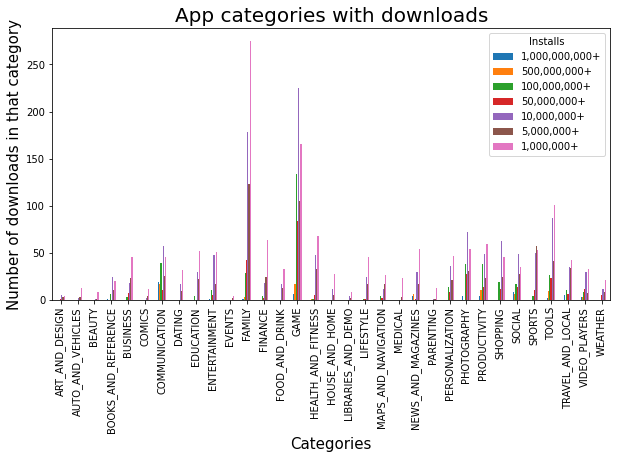

In [50]:
installs_df[['1,000,000,000+','500,000,000+','100,000,000+','50,000,000+','10,000,000+','5,000,000+','1,000,000+']].plot(kind='bar')
plt.rcParams['figure.figsize'] = (30,5)
plt.title('App categories with downloads',fontsize=20)
plt.xlabel('Categories',fontsize=15)
plt.ylabel('Number of downloads in that category',fontsize=15)

### From the plot we can infer "family" and "game" type of apps dominate the playstore in terms of number of apps, so lets deep dive into it and find out what kind of apps they are by exploring their genres

In [51]:
df_family = df1[(df1['Category']=='FAMILY')]
df_family_genre = df_family['Genres'].value_counts()
df_family_genre_top = df_family_genre[df_family['Genres'].value_counts()>20]
df_family_genre.sum()

1972

Text(0.5, 0, 'Genres')

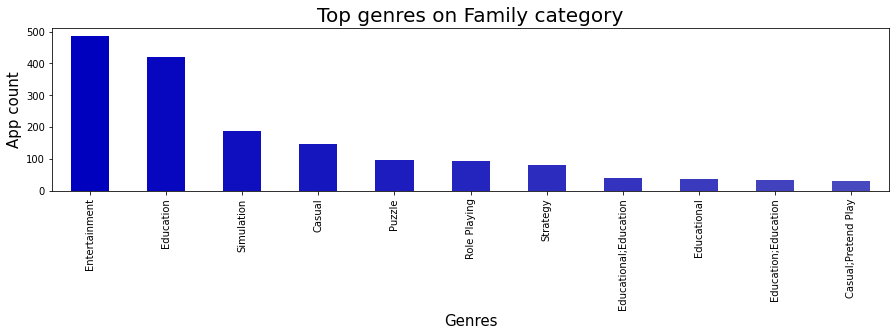

In [52]:
plt.rcParams['figure.figsize'] = (15,3)
df_family_genre_top.plot(kind='bar',color=my_colors)
plt.title('Top genres on Family category',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.xlabel('Genres',fontsize=15)

In [53]:
df1['Genres'].replace('Educational;Education','Education',inplace=True)
df1['Genres'].replace('Educational','Education',inplace=True)
df1['Genres'].replace('Education;Education','Education',inplace=True)
df1['Genres'].replace('Casual;Pretend Play','Casual',inplace=True)

In [54]:
df_family_genre_top

Entertainment            487
Education                420
Simulation               189
Casual                   148
Puzzle                    98
Role Playing              93
Strategy                  83
Educational;Education     41
Educational               37
Education;Education       35
Casual;Pretend Play       30
Name: Genres, dtype: int64

In [55]:
df_game = df1[df1['Category']=='GAME']
df_game_genre = df_game['Genres'].value_counts()
df_game_genre_top = df_game_genre[df_game['Genres'].value_counts()>20]

In [56]:
df1['Genres'].replace('Adventure;Action & Adventure','Combinations',inplace=True)
df1['Genres'].replace('Action;Action & Adventure','Combinations',inplace=True)
df1['Genres'].replace('Casual;Brain Games','Combinations',inplace=True)
df1['Genres'].replace('Casual;Creativity','Combinations',inplace=True)

df1['Genres'].replace('Casual;Pretend Play','Combinations',inplace=True)
df1['Genres'].replace('Simulation;Education','Combinations',inplace=True)
df1['Genres'].replace('Simulation;Action & Adventure','Combinations',inplace=True)
df1['Genres'].replace('Casual;Action & Adventure','Combinations',inplace=True)

Text(0.5, 0, 'Genres')

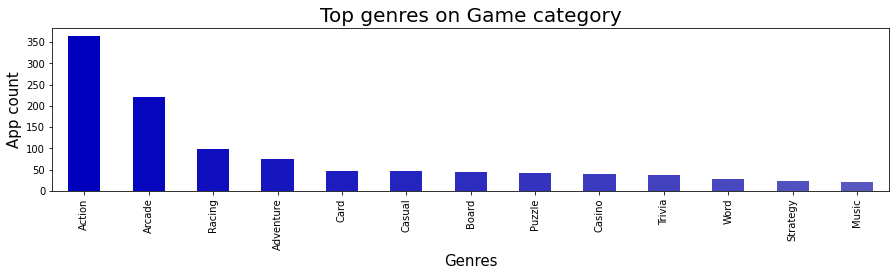

In [57]:
plt.rcParams['figure.figsize'] = (15,3)
df_game_genre_top.plot(kind='bar',color=my_colors)
plt.title('Top genres on Game category',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.xlabel('Genres',fontsize=15)

In [58]:
df_1B = df1[df1['Installs']=='1,000,000,000+']
_1B = df_1B['App'].unique()
_1B

array(['Google Play Books', 'Messenger – Text and Video Chat for Free',
       'WhatsApp Messenger', 'Google Chrome: Fast & Secure', 'Gmail',
       'Hangouts', 'Skype - free IM & video calls', 'Google Play Games',
       'Subway Surfers', 'Facebook', 'Instagram', 'Google+',
       'Google Photos', 'Maps - Navigate & Explore', 'Google Street View',
       'Google', 'Google Drive', 'YouTube', 'Google Play Movies & TV',
       'Google News'], dtype=object)

In [59]:
df_1Billion = df1[df1['App']=='Google Play Books']
for i in _1B:
  df_B = df1[df1['App']==i]
  df_1Billion = pd.concat([df_1Billion,df_B],axis=0)

In [60]:
df_1Billion.drop(['Reviews','Last Updated'],axis=1,inplace=True)
df_1Billion = df_1Billion.drop_duplicates()
df_1Billion['Installs'].replace('1,000,000,000+','1B+',inplace=True)
df_1Billion

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,Varies with device,1B+,Free,0,Teen,Books & Reference,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,Varies with device,1B+,Free,0,Everyone,Communication,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,Varies with device,1B+,Free,0,Everyone,Communication,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,Varies with device,1B+,Free,0,Everyone,Communication,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,Varies with device,1B+,Free,0,Everyone,Communication,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,Varies with device,1B+,Free,0,Everyone,Communication,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,Varies with device,1B+,Free,0,Everyone,Communication,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,Varies with device,1B+,Free,0,Teen,Entertainment,Varies with device,Varies with device
5856,Google Play Games,FAMILY,4.3,Varies with device,1B+,Free,0,Teen,Entertainment,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,76M,1B+,Free,0,Everyone 10+,Arcade,1.90.0,4.1 and up


In [61]:
df_1Billion = df_1Billion[['App','Category','Installs']].reset_index()
df_1Billion.drop('index',axis=1,inplace=True)
df_1Billion.set_index('App')

,Category,Installs
App,,
Google Play Books,BOOKS_AND_REFERENCE,1B+
Messenger – Text and Video Chat for Free,COMMUNICATION,1B+
WhatsApp Messenger,COMMUNICATION,1B+
Google Chrome: Fast & Secure,COMMUNICATION,1B+
Gmail,COMMUNICATION,1B+
Hangouts,COMMUNICATION,1B+
Skype - free IM & video calls,COMMUNICATION,1B+
Google Play Games,ENTERTAINMENT,1B+
Google Play Games,FAMILY,1B+


Text(0.5, 0, 'Categories')

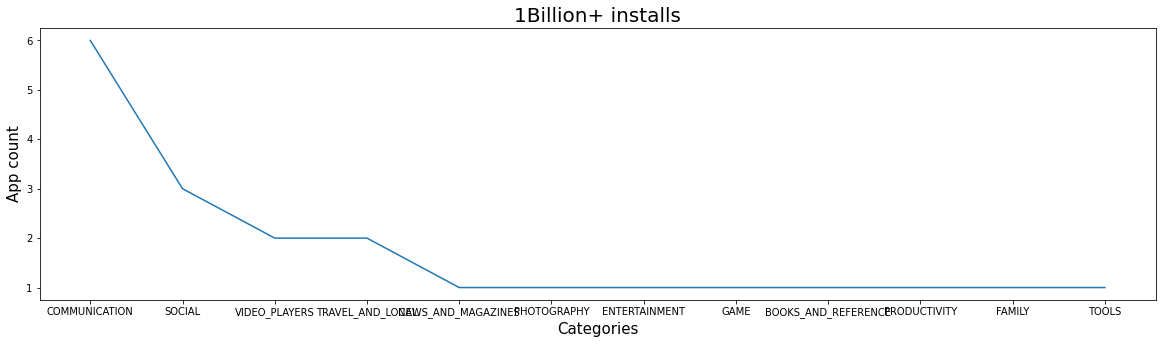

In [62]:
plt.rcParams['figure.figsize'] = (20,5)
sns.lineplot(data=df_1Billion['Category'].value_counts())
plt.title('1Billion+ installs',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.xlabel('Categories',fontsize=15)

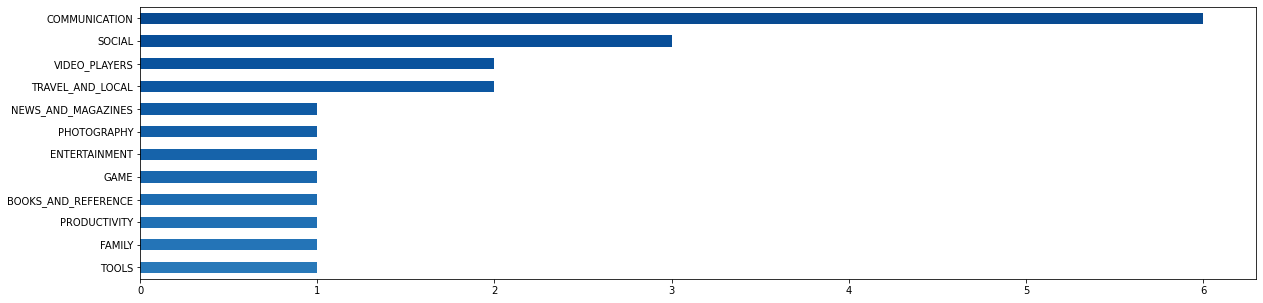

In [63]:
cmap = plt.get_cmap('Blues')
colour = [cmap(i) for i in list(np.linspace(0.9,0.1))]
df_1Billion['Category'].value_counts().plot(kind='barh',color=colour)
plt.gca().invert_yaxis()

In [64]:
df_1Billion = df_1Billion['Category'].value_counts().reset_index()
df_1Billion

,index,Category
0,COMMUNICATION,6
1,SOCIAL,3
2,VIDEO_PLAYERS,2
3,TRAVEL_AND_LOCAL,2
4,NEWS_AND_MAGAZINES,1
5,PHOTOGRAPHY,1
6,ENTERTAINMENT,1
7,GAME,1
8,BOOKS_AND_REFERENCE,1
9,PRODUCTIVITY,1


### Though family and gaming apps is in large number when it comes to popularity apps under communication and social category is the clear winner 

In [65]:
df1_r = df1
df1_r['Installs'] = df1['Installs'].str.replace(',','')
df1_r['Installs'] = df1['Installs'].str.replace('+','')
df1_r['Installs'] = df1['Installs'].replace('Free',np.nan)
df1_r['Installs'] = df1['Installs'].astype(float)

In [66]:
df1_r['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64